In [80]:
train = 'train'
test = 'test'

eng = 'english'
ara = 'arabic'

languages = [eng, ara]
categories = [train, test]

dataset_root_path = 'C:/Users/GTS/Desktop/EN &AR/cv-corpus-6.1-2020-12-11/data/'

image_width = 500
image_height = 128

augment_data_factor = 1.0 # Set-up how much of the training data should be augmented

In [81]:
import os
import librosa as lr
from librosa.display import waveplot
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
from IPython.display import Audio
import soundfile as sf

In [82]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, sample_rate = lr.load(audio_file_path)
    return audio_segment, sample_rate

    warnings.simplefilter('default', UserWarning)

In [83]:
def add_noise(audio_segment, gain):
    num_samples = audio_segment.shape[0]
    noise = gain * np.random.normal(size=num_samples)
    return audio_segment + noise

In [89]:
audio, sample_rate = load_audio_file(audio_file)

Audio(audio, rate=sample_rate)

In [90]:
audio_segment_with_noise = add_noise(audio, 0.005)

Audio(audio_segment_with_noise, rate=sample_rate)

In [91]:
def augment_audio_file_with_noise(audio_file_path):
    audio_segment, sample_rate = load_audio_file(audio_file_path)
    audio_segment_with_noise = add_noise(audio_segment, 0.005)
    audio_file_path_without_extension = os.path.splitext(audio_file_path)[0]
    augmented_audio_file_path = audio_file_path_without_extension + '_augmented_noise.wav'
    sf.write(augmented_audio_file_path, audio_segment_with_noise, sample_rate)

In [92]:
for lang in languages:
    category = train
        
    all_audio_files = audio_files[lang + '.' + category]
        
    num_files = int(len(all_audio_files) * augment_data_factor)

    for i in range(num_files):
        if i % (num_files / 10) == 0:
            print('Still processing ' + lang + ' ' + category + ' ' + str(i) + '/' + str(num_files))
        augment_audio_file_with_noise(all_audio_files[i])

Still processing english train 0/16000
Still processing english train 1600/16000
Still processing english train 3200/16000
Still processing english train 4800/16000
Still processing english train 6400/16000
Still processing english train 8000/16000
Still processing english train 9600/16000
Still processing english train 11200/16000
Still processing english train 12800/16000
Still processing english train 14400/16000
Still processing arabic train 0/16000
Still processing arabic train 1600/16000
Still processing arabic train 3200/16000
Still processing arabic train 4800/16000
Still processing arabic train 6400/16000
Still processing arabic train 8000/16000
Still processing arabic train 9600/16000
Still processing arabic train 11200/16000
Still processing arabic train 12800/16000
Still processing arabic train 14400/16000


In [93]:
sample_rate = 8000
image_width = 500
image_height = 128

In [94]:
import os
import librosa as lr
from librosa.display import waveplot
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import imageio
import warnings
from IPython.display import Audio

In [95]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, _ = lr.load(audio_file_path, sr=sample_rate)
    return audio_segment

    warnings.simplefilter('default', UserWarning)

In [96]:
def fix_audio_segment_to_10_seconds(audio_segment):
    target_len = 10 * sample_rate
    audio_segment = np.concatenate([audio_segment]*3, axis=0)
    audio_segment = audio_segment[0:target_len]
    
    return audio_segment

In [97]:
def spectrogram(audio_segment):
    # Compute mel-scaled spectrogram image
    hl = audio_segment.shape[0] // image_width
    spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))

    #Logarithmic 
    image = lr.core.power_to_db(spec)

    # Convert to  matrix
    image_np = np.asmatrix(image)

    #   scale
    image_np_scaled_temp = (image_np - np.min(image_np))
    
    image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)

    return image_np_scaled[:, 0:image_width]

In [98]:
def to_integer(image_float):
    
    image_float_255 = image_float * 255.
    
    # Convert to uint8 
    image_int = image_float_255.astype(np.uint8)
    
    return image_int

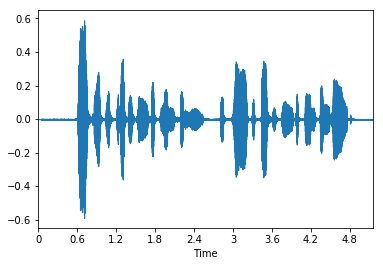

In [101]:
audio = load_audio_file(audio_file)

waveplot(audio, sr=sample_rate)
plt.show()

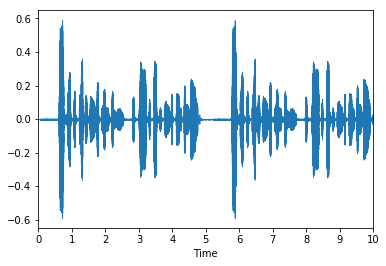

In [102]:
audio_fixed = fix_audio_segment_to_10_seconds(audio)

waveplot(audio_fixed, sr=sample_rate)
plt.show()

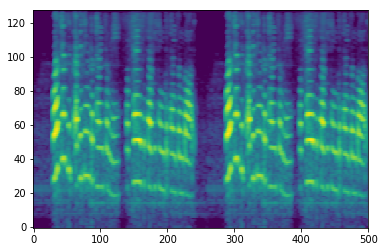

In [103]:
spectro = spectrogram(audio_fixed)

plt.imshow(spectro, origin='lower', aspect='auto')
plt.show()

In [105]:
def audio_to_image_file(audio_file):
    out_image_file = audio_file + '.png'
    audio = load_audio_file(audio_file)
    audio_fixed = fix_audio_segment_to_10_seconds(audio)
    if np.count_nonzero(audio_fixed) != 0:
        spectro = spectrogram(audio_fixed)
        spectro_int = to_integer(spectro)
        imageio.imwrite(out_image_file, spectro_int)
    else:
        print('WARNING! Detected an empty audio signal. Skipping...')

In [106]:
for lang in languages:
    for category in categories:
        all_audio_files = audio_files[lang + '.' + category]
        
        num_files = len(all_audio_files)
        
        for i in range(num_files):
            if i % (num_files / 50) == 0:
                print('Still processing ' + lang + ' ' + category + ' ' + str(i) + '/' + str(num_files))
            audio_to_image_file(all_audio_files[i])

Still processing english train 0/32000
Still processing english train 640/32000
Still processing english train 1280/32000
Still processing english train 1920/32000
Still processing english train 2560/32000
Still processing english train 3200/32000
Still processing english train 3840/32000
Still processing english train 4480/32000
Still processing english train 5120/32000
Still processing english train 5760/32000
Still processing english train 6400/32000
Still processing english train 7040/32000
Still processing english train 7680/32000
Still processing english train 8320/32000
Still processing english train 8960/32000
Still processing english train 9600/32000
Still processing english train 10240/32000
Still processing english train 10880/32000
Still processing english train 11520/32000
Still processing english train 12160/32000
Still processing english train 12800/32000
Still processing english train 13440/32000
Still processing english train 14080/32000
Still processing english train 